# PROJECT-2

I have taken the topic 'Walking and Cycling percentage in Borough', I found this dataset in the link: https://data.london.gov.uk/dataset/walking-and-cycling-borough
The data shows percentage of people who prefer walking or cycling in Borough from 2010-2017.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns

In [2]:
pd.set_option("display.max_rows",999)
pd.set_option("display.max_columns",999)
df=pd.read_csv('https://data.london.gov.uk/download/walking-and-cycling-borough/c7ae3969-9d32-40ab-8407-589464030231/Walking-Cycling.csv')
df

,LA code,Local Authority,Year,Frequency,Walking_%,Cycling_%
0,E09000001,City of London,2010/11,1x per month,78,30
1,E09000002,Barking and Dagenham,2010/11,1x per month,60,8
2,E09000003,Barnet,2010/11,1x per month,65,10
3,E09000004,Bexley,2010/11,1x per month,65,11
4,E09000005,Brent,2010/11,1x per month,62,14
5,E09000006,Bromley,2010/11,1x per month,68,14
6,E09000007,Camden,2010/11,1x per month,83,20
7,E09000008,Croydon,2010/11,1x per month,66,15
8,E09000009,Ealing,2010/11,1x per month,61,15
9,E09000010,Enfield,2010/11,1x per month,68,13


In [3]:
df=df.rename(columns={"LA code": "LA_code", "Local Authority": "Local_Authority","Cycling_%":"Cycling_percentage","Walking_%":"Walking_percentage"})
df.head()

,LA_code,Local_Authority,Year,Frequency,Walking_percentage,Cycling_percentage
0,E09000001,City of London,2010/11,1x per month,78,30
1,E09000002,Barking and Dagenham,2010/11,1x per month,60,8
2,E09000003,Barnet,2010/11,1x per month,65,10
3,E09000004,Bexley,2010/11,1x per month,65,11
4,E09000005,Brent,2010/11,1x per month,62,14


In [4]:
df.dtypes

LA_code               object
Local_Authority       object
Year                  object
Frequency             object
Walking_percentage     int64
Cycling_percentage    object
dtype: object

In [5]:
#inconsistency found in cycling_percentage
for i in df.Cycling_percentage:
    if i=='-':
        print(i)

-


In [6]:
#replacing the string with nan and dropping the row
columns = ['Cycling_percentage']
df = df.replace('-', pd.np.nan).dropna(axis=0, how='any', subset=columns)
df

,LA_code,Local_Authority,Year,Frequency,Walking_percentage,Cycling_percentage
0,E09000001,City of London,2010/11,1x per month,78,30
1,E09000002,Barking and Dagenham,2010/11,1x per month,60,8
2,E09000003,Barnet,2010/11,1x per month,65,10
3,E09000004,Bexley,2010/11,1x per month,65,11
4,E09000005,Brent,2010/11,1x per month,62,14
5,E09000006,Bromley,2010/11,1x per month,68,14
6,E09000007,Camden,2010/11,1x per month,83,20
7,E09000008,Croydon,2010/11,1x per month,66,15
8,E09000009,Ealing,2010/11,1x per month,61,15
9,E09000010,Enfield,2010/11,1x per month,68,13


# Data Characterization

In [7]:
df['Cycling_percentage']=df['Cycling_percentage'].astype(str).astype(int)
df.dtypes

LA_code               object
Local_Authority       object
Year                  object
Frequency             object
Walking_percentage     int64
Cycling_percentage     int32
dtype: object

In [8]:
df.describe()

,Walking_percentage,Cycling_percentage
count,1375.000000,1375.000000
mean,59.544000,9.121455
std,20.982232,6.510585
min,14.000000,0.000000
25%,43.000000,4.000000
50%,61.000000,8.000000
75%,78.000000,13.000000
max,95.000000,37.000000


# Sanity Check

In [9]:
#sanity check for walking and cycling, no value greater than 100 and less than 0

In [10]:
#checking for null values
df.isnull()

,LA_code,Local_Authority,Year,Frequency,Walking_percentage,Cycling_percentage
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False
7,False,False,False,False,False,False
8,False,False,False,False,False,False
9,False,False,False,False,False,False


In [11]:
df.isnull().sum()

LA_code               0
Local_Authority       0
Year                  0
Frequency             0
Walking_percentage    0
Cycling_percentage    0
dtype: int64

In [12]:
#There is no null value found. Hence, no action required.

In [13]:
#checking format for LA_code
check_LA_code = re.compile(r'[a-zA-Z0-9]+')
print([df.LA_code.apply(lambda x: bool(check_LA_code.match(x)))])

[0       True
1       True
2       True
3       True
4       True
5       True
6       True
7       True
8       True
9       True
10      True
11      True
12      True
13      True
14      True
15      True
16      True
17      True
18      True
19      True
20      True
21      True
22      True
23      True
24      True
25      True
26      True
27      True
28      True
29      True
30      True
31      True
32      True
33      True
34      True
35      True
36      True
37      True
38      True
39      True
40      True
41      True
42      True
43      True
44      True
45      True
46      True
47      True
48      True
49      True
50      True
51      True
52      True
53      True
54      True
55      True
56      True
57      True
58      True
59      True
60      True
61      True
62      True
63      True
64      True
65      True
66      True
67      True
68      True
69      True
70      True
71      True
72      True
73      True
74      True
75      True
76      Tru

In [14]:
#checking format for local_authority
check_Local_Authority = re.compile(r'[a-zA-Z]+')
print([df.Local_Authority.apply(lambda x: bool(check_Local_Authority.match(x)))])

[0       True
1       True
2       True
3       True
4       True
5       True
6       True
7       True
8       True
9       True
10      True
11      True
12      True
13      True
14      True
15      True
16      True
17      True
18      True
19      True
20      True
21      True
22      True
23      True
24      True
25      True
26      True
27      True
28      True
29      True
30      True
31      True
32      True
33      True
34      True
35      True
36      True
37      True
38      True
39      True
40      True
41      True
42      True
43      True
44      True
45      True
46      True
47      True
48      True
49      True
50      True
51      True
52      True
53      True
54      True
55      True
56      True
57      True
58      True
59      True
60      True
61      True
62      True
63      True
64      True
65      True
66      True
67      True
68      True
69      True
70      True
71      True
72      True
73      True
74      True
75      True
76      Tru

In [15]:
#checking format for year
check_Year= re.compile(r'[0-9][0-9][0-9][0-9]\/[0-9][0-9]')
print([df.Year.apply(lambda x: bool(check_Year.match(x)))])

[0       True
1       True
2       True
3       True
4       True
5       True
6       True
7       True
8       True
9       True
10      True
11      True
12      True
13      True
14      True
15      True
16      True
17      True
18      True
19      True
20      True
21      True
22      True
23      True
24      True
25      True
26      True
27      True
28      True
29      True
30      True
31      True
32      True
33      True
34      True
35      True
36      True
37      True
38      True
39      True
40      True
41      True
42      True
43      True
44      True
45      True
46      True
47      True
48      True
49      True
50      True
51      True
52      True
53      True
54      True
55      True
56      True
57      True
58      True
59      True
60      True
61      True
62      True
63      True
64      True
65      True
66      True
67      True
68      True
69      True
70      True
71      True
72      True
73      True
74      True
75      True
76      Tru

In [16]:
#sorting frequency
df = df.sort_values(by=["Frequency"])
df.head()

,LA_code,Local_Authority,Year,Frequency,Walking_percentage,Cycling_percentage
0,E09000001,City of London,2010/11,1x per month,78,30
697,E09000010,Enfield,2014/15,1x per month,86,8
696,E09000009,Ealing,2014/15,1x per month,87,15
695,E09000008,Croydon,2014/15,1x per month,87,13
694,E09000007,Camden,2014/15,1x per month,93,19


# Hypothesis 1
The residents of London Borough prefer to walk rather than cycling to go from one place to another.

In [17]:
#To prove the hypothesis, we will take the average of walking and cycling percentage of people of all the local authorities from 2010-2017.

In [25]:
#We will create a list to store the average values of walking and cycling for bar plot
Y=[0,0]

In [26]:
Y=(df['Walking_percentage'].mean(axis=0),df['Cycling_percentage'].mean(axis=0))
Y

(59.544, 9.121454545454545)

In [27]:
X=['Walking_percentage','Cycling_percentage']

<BarContainer object of 2 artists>

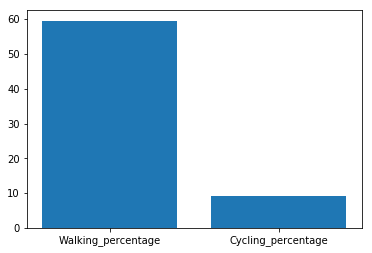

In [28]:
plt.bar(X,Y)

The hypothesis is proved valid as the average of Walking_percentage is more than Cycling_percenatge in all local authorities. Therefore, people of London Borough, prefer to walk rather than cycle. 

# Hypothesis 2
From the past 5 years, percentage of people cycling is increasing in London Borough.

In [22]:
#To prove the hypothesis, we will group Cycling_percentage by year(2010-2017) for all the local authorities and take the average for each year. 

In [23]:
group=df.groupby("Year")["Cycling_percentage"].mean()
group

Year
2010/11     9.029070
2011/12     8.461988
2012/13     8.232558
2013/14     8.093023
2014/15     8.412791
2015/16    10.488372
2016/17    10.116279
2017/18    10.133721
Name: Cycling_percentage, dtype: float64

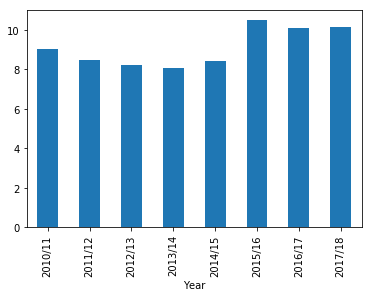

In [24]:
group.plot.bar()

The hypothesis is invalid as percentage of people cycling has not increased from the past five years, it decreased in 2013/2014 then increased in 2014/2015 and 2015/2016 but again decreased in 2016/2017. 